In [18]:
from collections import defaultdict 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

ques_id_to_drop = [25131, 25132, 25133, 25134, 25140, 25141, 25142, 25143, 25144]
opt2imp = pd.read_csv('Performance/feature_importance.csv', index_col='Feature')
ques2trait = pd.read_csv('Extra/ques-trait_map.csv', index_col='QuestionId')

ques2imp = defaultdict(float)
for index, rows in opt2imp.iterrows():
    quesid, optionid = index.split('_')
    ques2imp[quesid] += rows['Importance']

trait2imp = defaultdict(float)
for index, rows in ques2trait.iterrows():
    quesid, trait = index, rows['TraitName'].split('Channel_')[-1].split('_Max')[0]
    if quesid in ques_id_to_drop: continue
    trait2imp[trait] += ques2imp[str(quesid)]

trait2imp = sorted(trait2imp.items(), key=lambda x: x[1], reverse=True)
trait2imp = {key: round(value*100, 2) for key, value in trait2imp}
traits, importance = zip(*trait2imp.items())

plt.figure(figsize=(10, 6))
bars = plt.bar(traits, importance, color='skyblue')
plt.xlabel('Traits')
plt.ylabel('Importance (%)')
plt.title('Relative Importance of Traits')
plt.xticks(rotation=45, ha='right')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom')

plt.tight_layout()
# plt.savefig('Performance/Traits Importance.png')
plt.close()

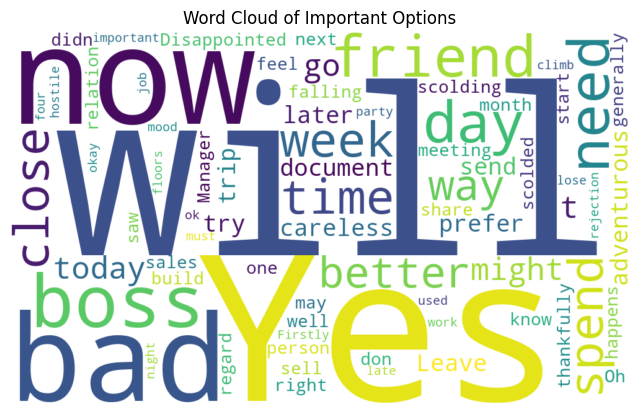

In [87]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

opt2name = pd.read_csv('test.csv')
opt2name = opt2name[opt2name['SectionName'] == 'PMaps Sales Orientation']
opt2name = opt2name[['OriginalOptionId', 'OptionName']].drop_duplicates().set_index('OriginalOptionId')

opt2imp = pd.read_csv('Attrition/feature_importance.csv', index_col='Feature')
top_opt = opt2imp.sort_values(by='Importance', ascending=False).head(int(len(df) * 0.25))
opt_chosen = list(map(lambda x: x.split('_')[-1], top_opt.index.tolist()))

words = [opt2name.loc[int(opt),'OptionName'].strip() for opt in opt_chosen]
text = ' '.join(words)

wordcloud = WordCloud(width=1000, height=600, background_color='white').generate(text)
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()
plt.title('Word Cloud of Important Options')
# plt.savefig('Attrition/Word Cloud.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

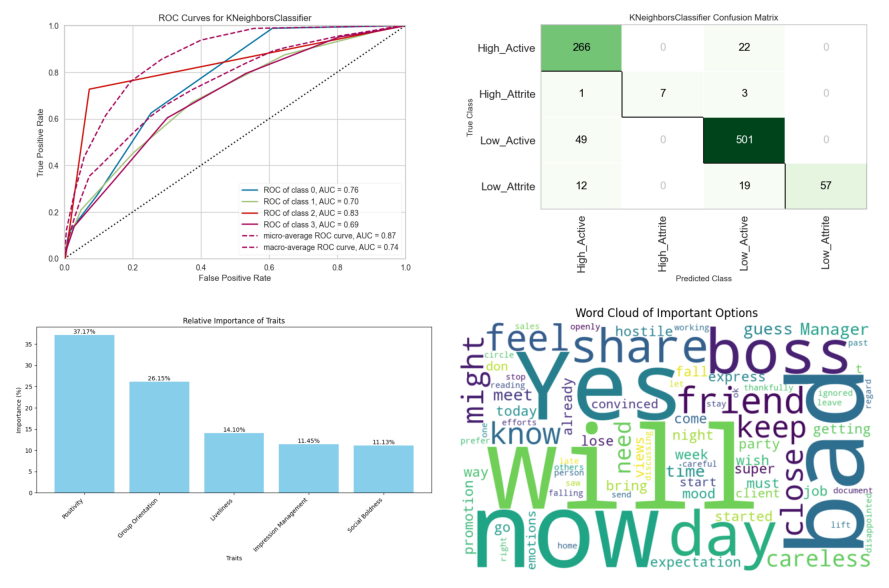

In [97]:
import matplotlib.image as mpimg

folder = 'Joint'
image_paths = [f'{folder}/AUC.png', f'{folder}/Confusion Matrix.png', f'{folder}/Traits Importance.png', f'{folder}/Word Cloud.png']
images = [mpimg.imread(path) for path in image_paths]

fig, axs = plt.subplots(2, 2, figsize=(9, 6))
axs_flat = axs.flatten()

for img, ax in zip(images, axs_flat):
    ax.imshow(img)
    ax.axis('off') 

plt.tight_layout()
plt.savefig(f'{folder}/graph.png', bbox_inches='tight', pad_inches=0.1, dpi=300)
plt.show()